Daily homework: Using the fixed intercept of 3.6, try 100 different values for the slope between -.005 and +.005. For each slope, calculate the likelihood of the has_megalaima observations. Plot slope versus the likelihood of the observations given that slope.

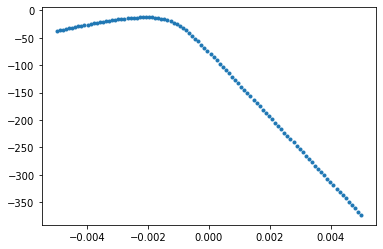

In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli

# Load data
sites = pd.read_table("../data/eco_data/eco_sites.txt")
counts = pd.read_table("../data/eco_data/species_counts.txt")

# Add has_mega column to determine which sites have Megalaima
is_mega = counts.columns.str.contains('Megalaima')
sites['has_mega'] = counts.loc[:,is_mega].sum(axis=1) > 0

# Fixed intercept
b = 3.6

# 100 slopes between -0.005 and 0.005
slopes = np.linspace(-0.005, 0.005, 100)

likelihoods = []
# For each slope
for slope in slopes:
    # Calculate what the predicted log_odds of megalaima would be
    log_odds_mega = sites['Elevation'] * slope + b
    # Convert log odds to probability
    ps = 1/(1 + np.exp(-1 * log_odds_mega))
    # Calculate the probability of observing the actual data under our proposed probabilities at each elevation given the slope
    bernoulli_ps = bernoulli.pmf(sites['has_mega'], p=ps)
    # Calculate the log likelihood given those probabilities
    bernoulli_likelihood = np.log(bernoulli_ps).sum()
    # Append the likelihood to the list
    likelihoods.append(bernoulli_likelihood)

# Plot likelihoods vs. slopes
f, ax = plt.subplots(1)
ax.plot(slopes, likelihoods, '.')